nodig voor de pairs trading mean reversion strategie:
- testen corellatie dmv heat chart en daarop selecteren
- cadf voor cointegratie test, gebruik beide volgordes mogelijk x, y en y, x om negatiefste uitkomst te krijgen en daarmee bereken je hedge ratio
- lineaire regressie om de hedge ratio (beta te berekenen)
- of johansen test, die geeft automatisch de beste en de hedge ratio is de eigenvector
- half life om periode van de ma en std te berekenen, dit is zo omdat hoewel stationair, het gemiddelde kan blijven veranderen.
- z score om te versimpelen naar standaard deviaties zscore; (x - mean)/std
- halflife is -log(2)/labda en labda hoort bij de cadf
https://www.youtube.com/watch?v=f73ItMWO4z8

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
tickers = ['XOM',
    'CVX',
    'COP',
    'EOG',
    'SLB',
    'OXY',
    'VLO',
    'PXD',
    'DVN',
    'WMB',
    'LNG',
    'HAL']

def get_data(tickers):  
    prices_df = pd.DataFrame()
    columns_names = []

    for ticker in tickers:
        df = yf.download(ticker, auto_adjust=True, start="2010-1-1", end="2015-1-1")
        new_column = df['Close']
        prices_df = pd.concat([prices_df, new_column], axis=1)
        columns_names.append(ticker)
    prices_df.columns = columns_names
    return prices_df

df = get_data(tickers)

    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 2010-01-04 00:00:00 to 2014-12-31 00:00:00
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   XOM     1258 non-null   float64
 1   CVX     1258 non-null   float64
 2   COP     1258 non-null   float64
 3   EOG     1258 non-null   float64
 4   SLB     1258 non-null   float64
 5   OXY     1258 non-null   float64
 6   VLO     1258 non-null   float64
 7   PXD     1258 non-null   float64
 8   DVN     1258 non-null   float64
 9   WMB     1258 non-null   float64
 10  LNG     1258 non-null   float64
 11  HAL     1258 non-null   float64
dtypes: float64(12)
memory usage: 127.8+ KB


In [5]:
corr = df.corr()
corr

,XOM,CVX,COP,EOG,SLB,OXY,VLO,PXD,DVN,WMB,LNG,HAL
XOM,1.000000,0.972100,0.943768,0.819168,0.808127,0.685561,0.896940,0.891847,0.001383,0.912345,0.837634,0.759818
CVX,0.972100,1.000000,0.942421,0.792077,0.773511,0.670707,0.865945,0.896060,-0.065896,0.886193,0.801042,0.750212
COP,0.943768,0.942421,1.000000,0.925673,0.895132,0.725901,0.921401,0.967657,0.091266,0.941342,0.921295,0.871000
EOG,0.819168,0.792077,0.925673,1.000000,0.871994,0.640785,0.933445,0.950189,0.118899,0.907679,0.955426,0.865151
SLB,0.808127,0.773511,0.895132,0.871994,1.000000,0.836659,0.833011,0.873157,0.450637,0.821117,0.843301,0.962632
OXY,0.685561,0.670707,0.725901,0.640785,0.836659,1.000000,0.601282,0.709337,0.560942,0.600257,0.596840,0.810304
VLO,0.896940,0.865945,0.921401,0.933445,0.833011,0.601282,1.000000,0.924927,0.002736,0.910373,0.930528,0.823173
PXD,0.891847,0.896060,0.967657,0.950189,0.873157,0.709337,0.924927,1.000000,0.062410,0.895876,0.904689,0.870183
DVN,0.001383,-0.065896,0.091266,0.118899,0.450637,0.560942,0.002736,0.062410,1.000000,-0.002965,0.054145,0.422330
WMB,0.912345,0.886193,0.941342,0.907679,0.821117,0.600257,0.910373,0.895876,-0.002965,1.000000,0.959102,0.782132


In [6]:
for column in corr:
    names = [corr[column].nlargest(2).index[1], corr[column].name]
    value = corr[column].nlargest(2)[1]
    print(names, value)
    

['CVX', 'XOM'] 0.972099685472463
['XOM', 'CVX'] 0.972099685472463
['PXD', 'COP'] 0.9676571715052074
['LNG', 'EOG'] 0.9554262598673479
['HAL', 'SLB'] 0.9626316807582068
['SLB', 'OXY'] 0.8366591873977705
['EOG', 'VLO'] 0.9334449192443559
['COP', 'PXD'] 0.9676571715052074
['OXY', 'DVN'] 0.5609420126149712
['LNG', 'WMB'] 0.9591019642468386
['WMB', 'LNG'] 0.9591019642468386
['SLB', 'HAL'] 0.9626316807582068


<AxesSubplot:>

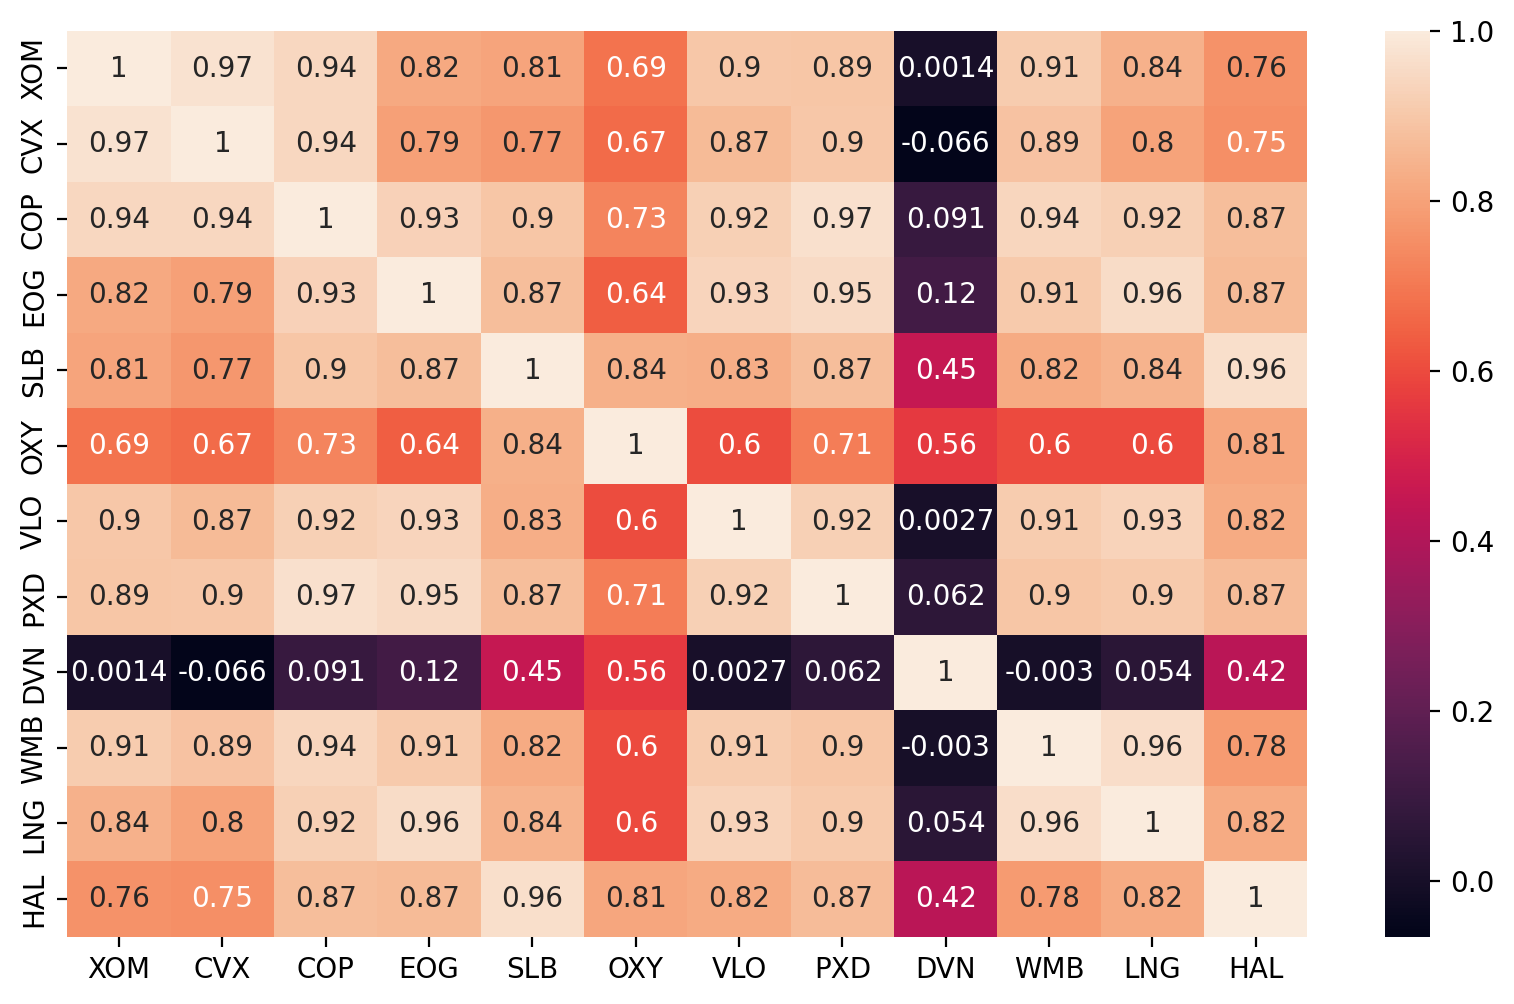

In [7]:
import seaborn as sn
from matplotlib.pyplot import figure
figure(figsize=(10,6), dpi=200)
sn.heatmap(corr, annot=True)

<AxesSubplot:>

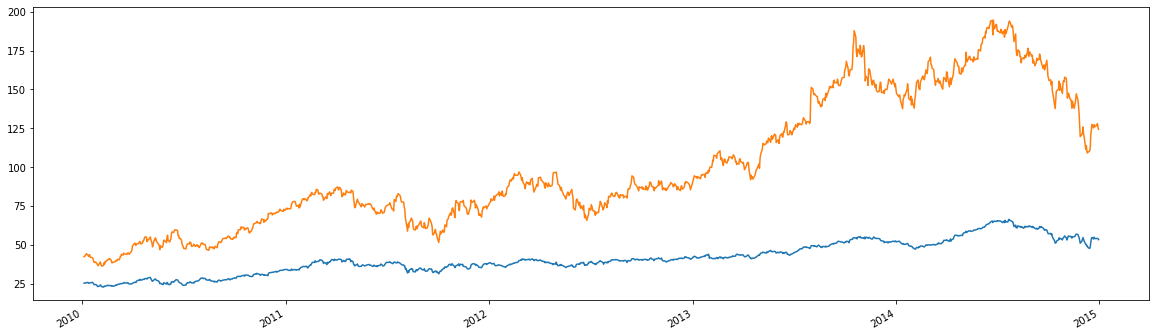

In [8]:
df['COP'].plot(figsize=(20,6))
(df['PXD']).plot(figsize=(20,6))

In [15]:
#cop als afhankelijke
import statsmodels.api as sm

y = df['COP'].tolist()
x = df['PXD'].tolist()
#als je variabele aan andere afhankelijk wilt maken kan het met of zonder constante er tussen doen maar met is accurater
x = sm.add_constant(x)

results1 = sm.OLS(y, x).fit()
results1.params


array([17.19271538,  0.24135875])

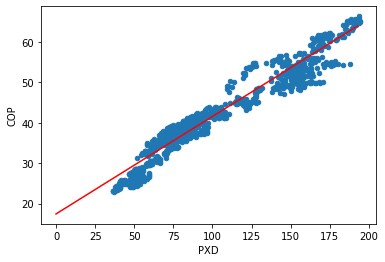

In [16]:
#omgekeerde
df.plot.scatter(x='PXD', y='COP')
x = np.arange(x.min(), x.max(), 1)
y = x * results1.params[1] + results1.params[0]
plt.plot(y, 'r')
plt.show()

<AxesSubplot:>

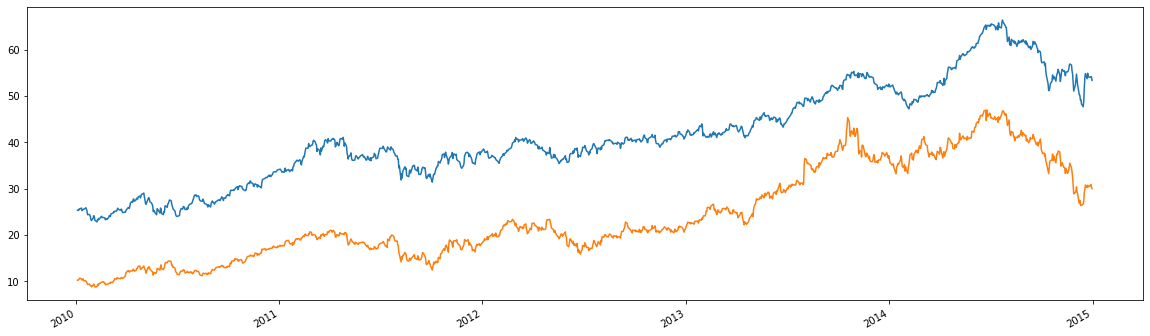

In [17]:
#omgekeerde
df['COP'].plot(figsize=(20,6))
(df['PXD']*results1.params[1]).plot(figsize=(20,6))


<AxesSubplot:>

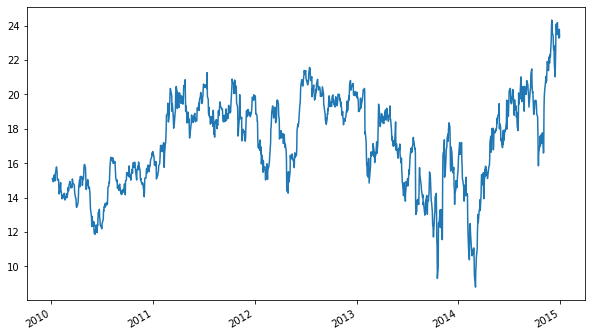

In [18]:
df3 = pd.DataFrame()
df3 = pd.concat([df3, df[['COP', 'PXD']]])
df3['spread'] = df['COP'] - results1.params[1] * df['PXD']
df3['spread'].plot(figsize=(10,6))
# df3['residuals'] = results1.resid
# df3['residuals'].plot(figsize=(10,6))


In [131]:
import statsmodels.tsa.stattools as ts

adf2 = ts.adfuller(df3['residuals'])
print(f'ADF:{adf2}')

ADF:(-2.871513940483988, 0.04876223256289036, 0, 1257, {'1%': -3.4355629707955395, '5%': -2.863842063387667, '10%': -2.567995644141416}, 1712.5905206221285)


In [9]:
#https://www.geeksforgeeks.org/ordinary-least-squares-ols-using-statsmodels/
import statsmodels.api as sm

y = df['PXD'].tolist()
x = df['COP'].tolist()
#als je variabele aan andere afhankelijk wilt maken kan het met of zonder constante er tussen doen maar met is accurater
x = sm.add_constant(x)

results = sm.OLS(y, x).fit()
results.params


array([-60.33227603,   3.87953788])

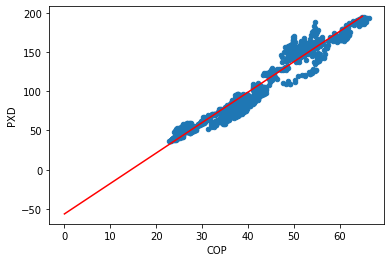

In [10]:
df.plot.scatter(x='COP', y='PXD')
x = np.arange(x.min(), x.max(), 1)
y = x * results.params[1] + results.params[0]
plt.plot(y, 'r')
plt.show()

<AxesSubplot:>

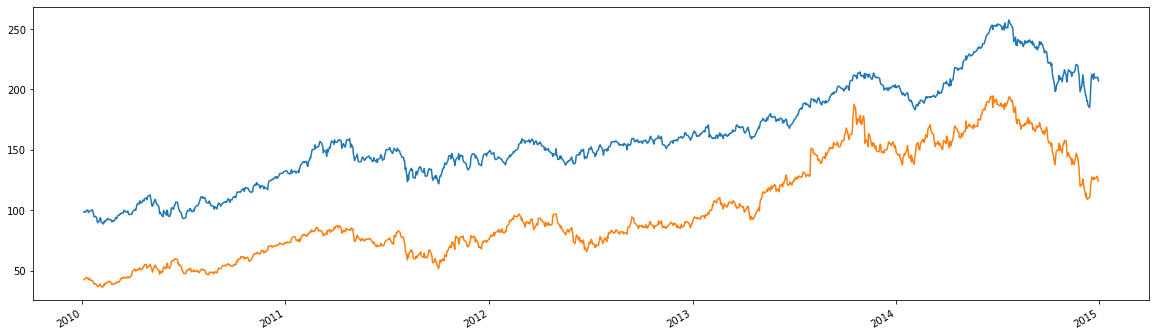

In [11]:
(df['COP']*results.params[1]).plot(figsize=(20,6))
df['PXD'].plot(figsize=(20,6))

<AxesSubplot:>

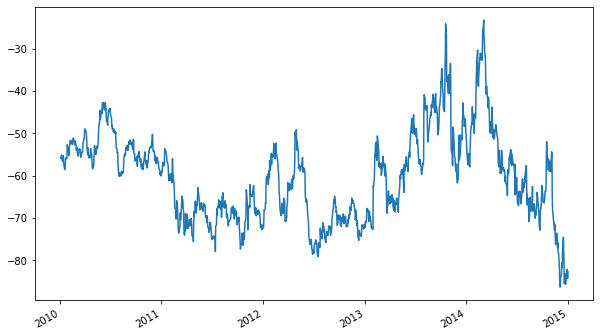

In [12]:
df2 = pd.DataFrame()
df2 = pd.concat([df2, df[['COP', 'PXD']]])
df2['spread'] = df['PXD'] - results.params[1] * df['COP']
df2['spread'].plot(figsize=(10,6))
# df2['residuals'] = results.resid
# df2['residuals'].plot(figsize=(10,6))


In [13]:
import statsmodels.tsa.stattools as ts

adf = ts.adfuller(df2['spread'])
print(f'ADF:{adf}')

ADF:(-2.9449425509479594, 0.040365859308172006, 0, 1257, {'1%': -3.4355629707955395, '5%': -2.863842063387667, '10%': -2.567995644141416}, 5162.923258875922)


In [75]:
def beta_cafd(df, dependent_series, independent_series):
    df2 = pd.DataFrame()
    df2 = pd.concat([df2, df[[dependent_series, independent_series]]])
    y = df[dependent_series].tolist()
    x = df[independent_series].tolist()
    #als je variabele aan andere afhankelijk wilt maken kan het met of zonder constante er tussen doen maar met is accurater
    x = sm.add_constant(x)

    results = sm.OLS(y, x).fit()
    params = results.params
    df2['residuals'] = results.resid
    
    adf = ts.adfuller(df2['residuals'])
    
    return [df2, params, adf]
    

In [92]:
results = beta_cafd(df, 'PXD', 'COP')
df2 = results[0]
print(results)

[                   PXD        COP  residuals
2010-01-04   42.405064  25.327543   4.478178
2010-01-05   42.421692  25.351625   4.401378
2010-01-06   43.162003  25.534685   4.431502
2010-01-07   43.544617  25.433519   5.206592
2010-01-08   44.293251  25.655098   5.095604
...                ...        ...        ...
2014-12-24  125.979965  54.184208 -23.897446
2014-12-26  126.314056  53.991066 -22.814053
2014-12-29  128.034546  54.168766 -21.782957
2014-12-30  125.336914  54.029709 -23.941112
2014-12-31  124.317963  53.357502 -22.352211

[1258 rows x 3 columns], array([-60.33227854,   3.87953792]), (-2.944945193025764, 0.04036558044332673, 0, 1257, {'1%': -3.4355629707955395, '5%': -2.863842063387667, '10%': -2.567995644141416}, 5162.925868567403)]


<AxesSubplot:>

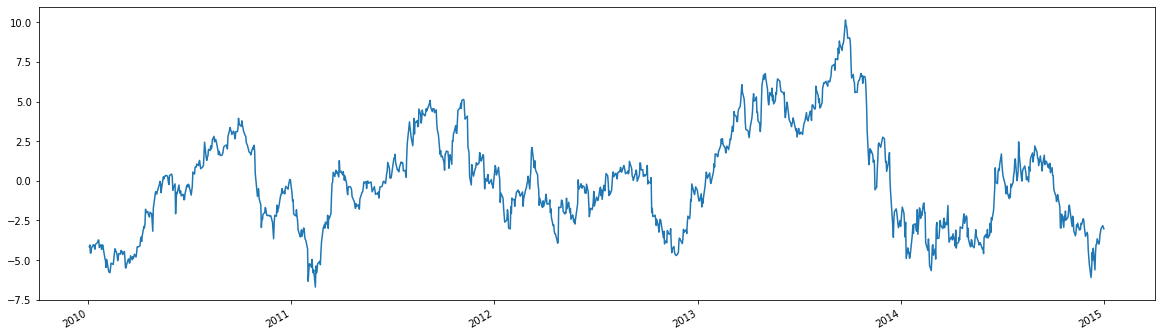

In [90]:
df2['residuals'].plot(figsize=(20,6))